# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import random
from scipy import stats as st
from pprint import pprint
from citipy import citipy
import openweathermapy as owm
#import API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Range of latitudes and longitudes, just for reference
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
cities=[]
while len(cities)<600:
    lat = (random.choice(range(-90,90)))
    long = (random.choice(range(-180,180)))
    city= citipy.nearest_city(lat,long).city_name
    if city not in cities:
        cities.append(city)

In [4]:
print(len(cities))

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#url api call
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
#Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Latitude","Longitude", "Temperature (F)"])

In [7]:
city_length=len(cities)
count = 1 #count number calls to api

print(f'Beginning Data Retrival from OpenWeather API \n ...........................................')
for city in cities:
    try:        
        print(f'Processing Record {count} of {city_length} | {city}')
        count +=1
        response=requests.get(query_url+city).json()
        temp=response['main']['temp']
        humid=response['main']['humidity']
        cloud=response['clouds']['all']
        wind=response['wind']['speed']
        lat1=response['coord']['lat']
        lon1=response['coord']['lon']
        
        line_df= pd.DataFrame([{"City": city, "Latitude": lat1, "Longitude": lon1,"Temperature (F)": response['main']['temp'], "Humidity (%)": response['main']['humidity'], "Cloudiness (%)": response['clouds']['all'], "Wind Speed (mph)": response['wind']['speed']}])
        WeatherPy_df=WeatherPy_df.append(line_df,ignore_index=True)
    except:
        print("No data found...")
    

Beginning Data Retrival from OpenWeather API 
 ...........................................
Processing Record 1 of 600 | katsuura
Processing Record 2 of 600 | khatanga
Processing Record 3 of 600 | naze
Processing Record 4 of 600 | amderma
No data found...
Processing Record 5 of 600 | gat
Processing Record 6 of 600 | taolanaro
No data found...
Processing Record 7 of 600 | tuktoyaktuk
Processing Record 8 of 600 | bluff
Processing Record 9 of 600 | upernavik
Processing Record 10 of 600 | saleaula
No data found...
Processing Record 11 of 600 | busselton
Processing Record 12 of 600 | sao filipe
Processing Record 13 of 600 | vaini
Processing Record 14 of 600 | jacareacanga
Processing Record 15 of 600 | port elizabeth
Processing Record 16 of 600 | ancud
Processing Record 17 of 600 | rikitea
Processing Record 18 of 600 | kodiak
Processing Record 19 of 600 | saint-philippe
Processing Record 20 of 600 | sorland
Processing Record 21 of 600 | bambous virieux
Processing Record 22 of 600 | gumdag
Pro

Processing Record 196 of 600 | rungata
No data found...
Processing Record 197 of 600 | garmsar
Processing Record 198 of 600 | port macquarie
Processing Record 199 of 600 | yaan
Processing Record 200 of 600 | touros
Processing Record 201 of 600 | chabahar
Processing Record 202 of 600 | saskylakh
Processing Record 203 of 600 | lompoc
Processing Record 204 of 600 | anadyr
Processing Record 205 of 600 | talalayivka
Processing Record 206 of 600 | belmonte
Processing Record 207 of 600 | junin
Processing Record 208 of 600 | grand river south east
No data found...
Processing Record 209 of 600 | oktyabrskiy
Processing Record 210 of 600 | sechura
Processing Record 211 of 600 | norman wells
Processing Record 212 of 600 | umzimvubu
No data found...
Processing Record 213 of 600 | sioux lookout
Processing Record 214 of 600 | san lazaro
Processing Record 215 of 600 | bethel
Processing Record 216 of 600 | maimon
No data found...
Processing Record 217 of 600 | lasa
Processing Record 218 of 600 | saint 

No data found...
Processing Record 392 of 600 | hamilton
Processing Record 393 of 600 | hirara
Processing Record 394 of 600 | meadow lake
Processing Record 395 of 600 | port moresby
Processing Record 396 of 600 | mpulungu
Processing Record 397 of 600 | novyy svit
Processing Record 398 of 600 | atambua
Processing Record 399 of 600 | nalut
Processing Record 400 of 600 | sita road
Processing Record 401 of 600 | culpeper
Processing Record 402 of 600 | roma
Processing Record 403 of 600 | ulladulla
Processing Record 404 of 600 | abha
Processing Record 405 of 600 | iquique
Processing Record 406 of 600 | sampit
Processing Record 407 of 600 | atbasar
Processing Record 408 of 600 | balabac
Processing Record 409 of 600 | yar-sale
Processing Record 410 of 600 | aripuana
Processing Record 411 of 600 | tevriz
Processing Record 412 of 600 | belaya gora
Processing Record 413 of 600 | tabiauea
No data found...
Processing Record 414 of 600 | mananjary
Processing Record 415 of 600 | addanki
Processing Re

No data found...
Processing Record 589 of 600 | pringsewu
Processing Record 590 of 600 | san patricio
Processing Record 591 of 600 | wajir
Processing Record 592 of 600 | ayagoz
Processing Record 593 of 600 | atkarsk
Processing Record 594 of 600 | formoso do araguaia
No data found...
Processing Record 595 of 600 | beroroha
Processing Record 596 of 600 | gorno-chuyskiy
No data found...
Processing Record 597 of 600 | chisec
Processing Record 598 of 600 | sorel
Processing Record 599 of 600 | kamenskoye
No data found...
Processing Record 600 of 600 | half moon bay


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
WeatherPy_df.to_csv("Output/WeatherData2020Oct30.csv", encoding="utf-8", index=False, header=True)
WeatherPy_df.head(10)

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,katsuura,35.13,140.30,64.44,51.0,20.0,11.41
1,khatanga,71.97,102.50,-9.71,86.0,0.0,5.95
2,naze,28.37,129.48,77.00,53.0,40.0,21.92
3,gat,31.61,34.76,73.94,100.0,59.0,1.99
4,tuktoyaktuk,69.45,-133.04,1.40,84.0,40.0,5.82
5,bluff,-46.60,168.33,53.01,85.0,100.0,14.00
6,upernavik,72.79,-56.15,18.48,94.0,79.0,2.66
7,busselton,-33.65,115.33,72.61,54.0,100.0,4.00
8,sao filipe,14.90,-24.50,80.11,62.0,100.0,16.15
9,vaini,-21.20,-175.20,75.20,78.0,75.0,11.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
print(WeatherPy_df["Humidity (%)"].max())
print(WeatherPy_df["Humidity (%)"].max())
print(WeatherPy_df.count())
print("There are no cities that have humidity > 100%")

100.0
100.0
City                538
Latitude            538
Longitude           538
Temperature (F)     538
Humidity (%)        538
Cloudiness (%)      538
Wind Speed (mph)    538
dtype: int64
There are no cities that have humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show>

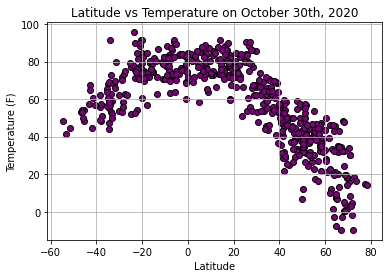

In [23]:
plt.scatter(WeatherPy_df['Latitude'],WeatherPy_df['Temperature (F)'], marker ="o", facecolors="purple", edgecolors="black")
plt.title('Latitude vs Temperature on October 30th, 2020')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig('Output/10302020TempvsLat.png')
plt.show

There appears to be a parabolic relation between temperature and latitude, with the peak temperature being near the Equator, due to the globe-like nature of the earth causing more of the Sun's light rays to hit near the equator.

## Latitude vs. Humidity Plot

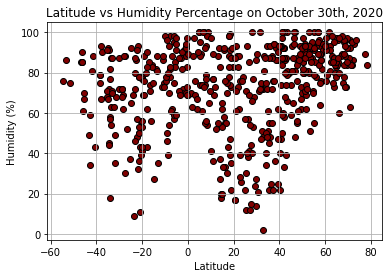

In [11]:
plt.scatter(WeatherPy_df['Latitude'], WeatherPy_df['Humidity (%)'], marker="o", facecolors="maroon", edgecolors='black')
plt.title('Latitude vs Humidity Percentage on October 30th, 2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Output/10302020HumidvsLat.png')
plt.show()

There appears to be little relation between Latitude and Humidity, however there are clusters near the 60 latitude at high humidity, though that is likely climactic or due to clustered cities. 

## Latitude vs. Cloudiness Plot

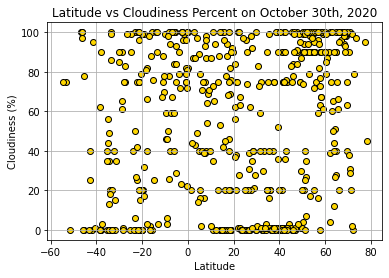

In [12]:
plt.scatter(WeatherPy_df['Latitude'], WeatherPy_df['Cloudiness (%)'], marker='o', facecolors='gold', edgecolors='black')
plt.title('Latitude vs Cloudiness Percent on October 30th, 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Output/10302020LatvsCloud.png')
plt.show()

Again, we aren't seeing much of a correlation here between these two variables, though one could assert that OpenWeather commonly characterizes cloud cover through intervals of 20, which probably are a way to quantify terms like "mostly cloudy" or "slightly cloudy".

## Latitude vs. Wind Speed Plot

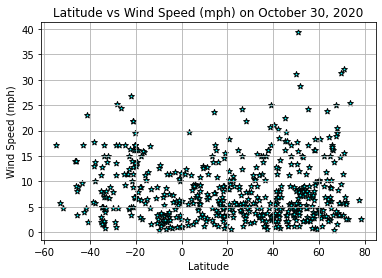

In [13]:
plt.scatter(WeatherPy_df['Latitude'], WeatherPy_df['Wind Speed (mph)'], marker='*', facecolors='cyan', edgecolors='black')
plt.title('Latitude vs Wind Speed (mph) on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Output/10302020LatvsWindSpeed.png')
plt.show()

There is a pretty even and varied distribution here with no trends to speak of between wind speed and latitude. 

## Linear Regression

In [14]:
#create df for northern and southern hemisphere
Ncities=WeatherPy_df.loc[WeatherPy_df["Latitude"]>=0,:]
Scities=WeatherPy_df.loc[WeatherPy_df["Latitude"]<=0,:]
print(Ncities.count())
print(Scities.count())

City                372
Latitude            372
Longitude           372
Temperature (F)     372
Humidity (%)        372
Cloudiness (%)      372
Wind Speed (mph)    372
dtype: int64
City                166
Latitude            166
Longitude           166
Temperature (F)     166
Humidity (%)        166
Cloudiness (%)      166
Wind Speed (mph)    166
dtype: int64


This distribution makes sense, because the Southern Hemisphere accounts for roughly 32% of Earth's land area.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8757570081258366.


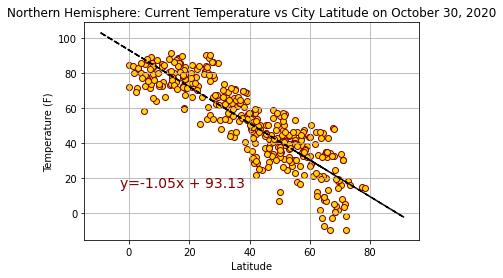

In [15]:
temp=Ncities['Temperature (F)']
latty=Ncities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,temp)
fit= slope * temp + intercept
plt.scatter(latty, temp, marker='o', facecolors='gold', edgecolors='maroon')
plt.plot(temp, fit, "--", color='black')

print(f"The r-value is {r_val}.")

plt.title('Northern Hemisphere: Current Temperature vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.annotate(f"y={round(slope,2)}x + {round(intercept,2)}", (-3,15), size=14, c='maroon')
plt.savefig('Output/10302020NLatvsTempREGRESSION.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6855953481653003.


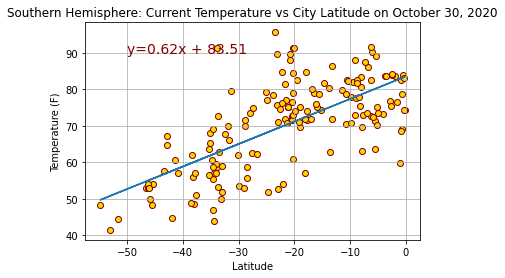

In [16]:
temp=Scities['Temperature (F)']
latty=Scities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,temp)
fit= slope * temp + intercept
plt.scatter(latty, temp, marker='o', facecolors='gold', edgecolors='maroon')


m, b = np.polyfit(latty,temp, 1)
plt.plot(latty, m*latty+b)

print(f"The r-value is {r_val}.")

plt.title('Southern Hemisphere: Current Temperature vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.annotate(f"y={round(m,2)}x + {round(b,2)}", (-50,90), size=14, c='maroon')
plt.savefig('Output/10302020SLatvsTempREGRESSION.png')
plt.show()

Both the Northern and Southern hemispheres show strong correlations between temperature and latitude, which exemplifies the idea of it being hotter closer to the equator. In Octber, though, the the Northern hemisphere is getting less sunlight, though, so there is sunlight shining to both hemispheres. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.34480342799547975.


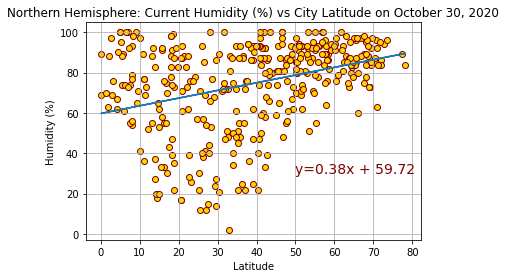

In [17]:
humidity=Ncities['Humidity (%)']
latty=Ncities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,humidity)
fit= slope * latty + intercept
plt.scatter(latty, humidity, marker='o', facecolors='gold', edgecolors='maroon')


m, b = np.polyfit(latty,humidity, 1)
plt.plot(latty, m*latty+b)

print(f"The r-value is {r_val}.")

plt.title('Northern Hemisphere: Current Humidity (%) vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.annotate(f"y={round(m,2)}x + {round(b,2)}", (50,30), size=14, c='maroon')
plt.savefig('Output/10302020NLatvsHumidREGRESSION.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.16427133216871773.


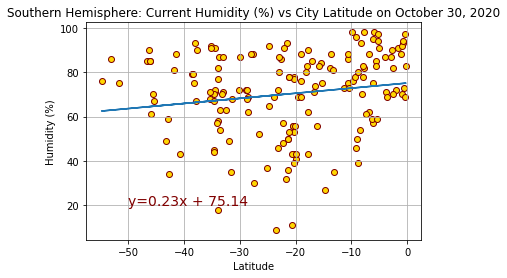

In [18]:
humidity=Scities['Humidity (%)']
latty=Scities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,humidity)
fit= slope * latty + intercept
plt.scatter(latty, humidity, marker='o', facecolors='gold', edgecolors='maroon')


m, b = np.polyfit(latty,humidity, 1)
plt.plot(latty, m*latty+b)

print(f"The r-value is {r_val}.")

plt.title('Southern Hemisphere: Current Humidity (%) vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.annotate(f"y={round(m,2)}x + {round(b,2)}", (-50,20), size=14, c='maroon')
plt.savefig('Output/10302020SLatvsHumidREGRESSION.png')
plt.show()

As for humidity's correlation with latitude, the r values gathered here suggest a weak relationship, if at all, between the two. It is more correlated in the Northern hemisphere, but not significantly sufficient to establish a direct relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.24301170796399113.


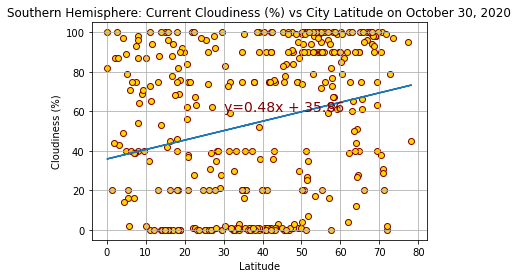

In [19]:
Cloudiness=Ncities['Cloudiness (%)']
latty=Ncities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,Cloudiness)
fit= slope * latty + intercept
plt.scatter(latty, Cloudiness, marker='o', facecolors='gold', edgecolors='maroon')


m, b = np.polyfit(latty,Cloudiness, 1)
plt.plot(latty, m*latty+b)

print(f"The r-value is {r_val}.")

plt.title('Southern Hemisphere: Current Cloudiness (%) vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.annotate(f"y={round(m,2)}x + {round(b,2)}", (30,60), size=14, c='maroon')
plt.savefig('Output/10302020NLatvsCloudREGRESSION.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.341036063880664.


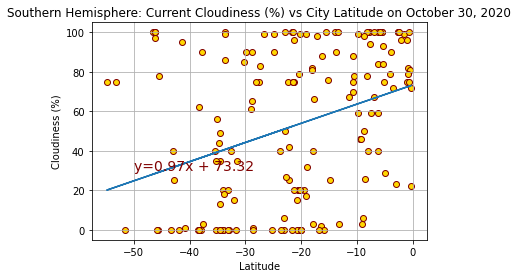

In [20]:
Cloudiness=Scities['Cloudiness (%)']
latty=Scities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,Cloudiness)
fit= slope * latty + intercept
plt.scatter(latty, Cloudiness, marker='o', facecolors='gold', edgecolors='maroon')


m, b = np.polyfit(latty,Cloudiness, 1)
plt.plot(latty, m*latty+b)

print(f"The r-value is {r_val}.")

plt.title('Southern Hemisphere: Current Cloudiness (%) vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.annotate(f"y={round(m,2)}x + {round(b,2)}", (-50,30), size=14, c='maroon')
plt.savefig('Output/10302020SLatvsCloudREGRESSION.png')
plt.show()

Cloud cover appears to not be correlated with latitude, as there are any data points spread throughout the graph. I would theorize that this has more to do with unique biomes and climactic processes than simply being in the northern or southern hemispheres. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.11431229499544848.


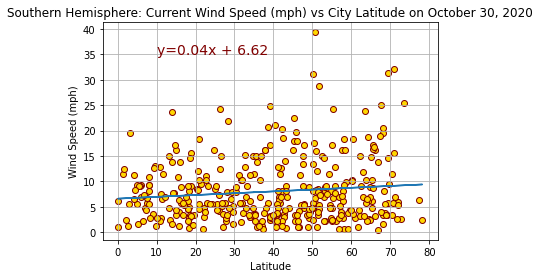

In [21]:
windspeedmph=Ncities['Wind Speed (mph)']
latty=Ncities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,windspeedmph)
fit= slope * latty + intercept
plt.scatter(latty, windspeedmph, marker='o', facecolors='gold', edgecolors='maroon')


m, b = np.polyfit(latty,windspeedmph, 1)
plt.plot(latty, m*latty+b)

print(f"The r-value is {r_val}.")

plt.title('Southern Hemisphere: Current Wind Speed (mph) vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.annotate(f"y={round(m,2)}x + {round(b,2)}", (10,35), size=14, c='maroon')
plt.savefig('Output/10302020NLatvsWindREGRESSION.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2396853814020003.


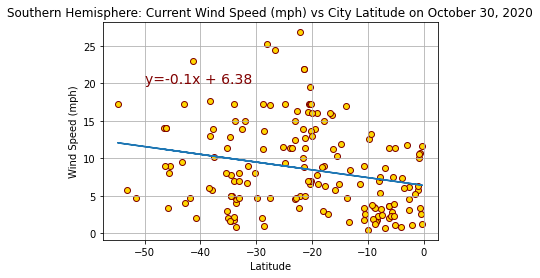

In [22]:
windspeedmph=Scities['Wind Speed (mph)']
latty=Scities['Latitude']

slope, intercept, r_val, p_val, std_err = st.linregress(latty,windspeedmph)
fit= slope * latty + intercept
plt.scatter(latty, windspeedmph, marker='o', facecolors='gold', edgecolors='maroon')


m, b = np.polyfit(latty,windspeedmph, 1)
plt.plot(latty, m*latty+b)

print(f"The r-value is {r_val}.")

plt.title('Southern Hemisphere: Current Wind Speed (mph) vs City Latitude on October 30, 2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.annotate(f"y={round(m,2)}x + {round(b,2)}", (-50,20), size=14, c='maroon')
plt.savefig('Output/10302020SLatvsWindREGRESSION.png')
plt.show()

Judging by the r values, there is no relationship between wind speed in miles per hour and latitude for the northern or southern hemispheres. 